<a href="https://colab.research.google.com/github/sarithamiryala/DeepLearning/blob/main/POC_for_Convolution_and_Pooling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

ROOT ="/content/drive/MyDrive/DataScience2024/DeepLearning/CNN"
os.chdir(ROOT)

In [2]:
car_image_path = "car1.jpeg"

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [4]:

def read_image(path,grayscale=True):
  car = cv2.imread(path)
  if grayscale:
    car = cv2.cvtColor(car,cv2.COLOR_BGR2GRAY)
  plt.imshow(car,cmap="gray")
  plt.show()
  return car

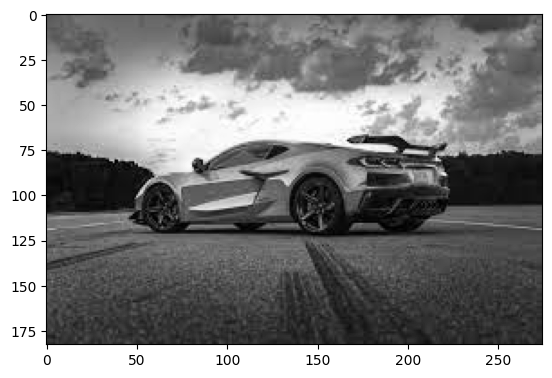

In [5]:

car = read_image(car_image_path)

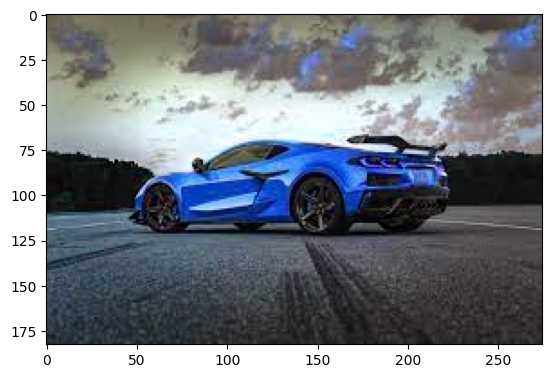

In [6]:
car_colour = read_image(car_image_path,grayscale=False)

In [7]:
car_colour.shape

(183, 275, 3)

In [8]:
row,col = car.shape
car = car.reshape((1,row,col,1))
#colour_car = car_colour.reshape((1,row,col,3))
car.shape

(1, 183, 275, 1)

In [9]:

CONV_LAYER = [tf.keras.layers.Conv2D(filters =1 ,
                                    kernel_size=(3,3),
                                    strides=(1,1),
                                    input_shape= car.shape[1:])]

conv_model = tf.keras.Sequential(CONV_LAYER)
conv_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 181, 273, 1)         │              10 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10 (40.00 B)

 Trainable params: 10 (40.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
#Trainable Parameters
# 3*3+1

In [11]:
out = conv_model.predict(car)
out.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


(1, 181, 273, 1)

In [12]:
(183-3+0)//1+1

181

In [13]:
(275-3+0)//1+1

273

TypeError: Invalid shape (1, 181, 273, 1) for image data

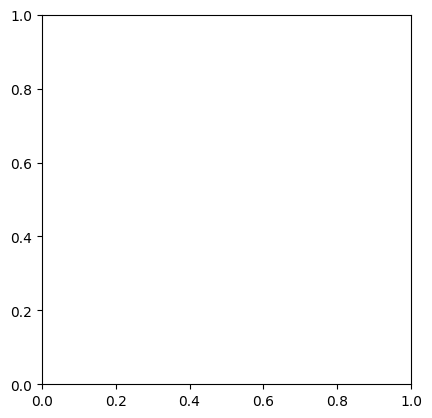

In [ ]:
plt.imshow(out,cmap="gray")

In [14]:
row,col = out.shape[1],out.shape[2]

In [15]:
reshaped_out = out.reshape(row,col)
reshaped_out

array([[ 94.54049 ,  95.602325,  96.63759 , ..., 116.95891 , 102.768616,
        103.04628 ],
       [ 95.98449 ,  97.06011 ,  98.54567 , ..., 109.08621 , 105.29791 ,
        114.12709 ],
       [ 97.86659 ,  98.92784 ,  99.95909 , ..., 101.57116 , 112.1888  ,
        127.88947 ],
       ...,
       [ 63.747887,  67.58754 ,  61.711094, ...,  46.588673,  46.143078,
         41.969723],
       [ 51.449722,  60.448883,  60.276886, ...,  47.58192 ,  42.25767 ,
         39.42718 ],
       [ 40.31572 ,  46.805176,  46.604836, ...,  46.727295,  39.70231 ,
         42.871357]], dtype=float32)

In [16]:
reshaped_out.shape

(181, 273)

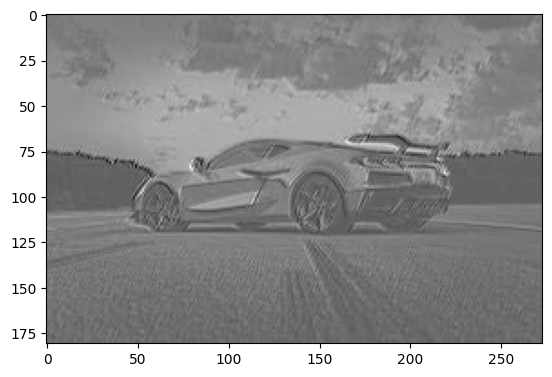

In [ ]:
plt.imshow(reshaped_out,cmap="gray")

#For Color Image

In [17]:
row,col,depth = car_colour.shape
color_car = car_colour.reshape((1,row,col,depth))
color_car.shape

(1, 183, 275, 3)

In [ ]:

CONV_LAYER = [tf.keras.layers.Conv2D(filters =1 ,
                                    kernel_size=(3,3),
                                    strides=(1,1),
                                    input_shape= color_car.shape[1:])]

conv_model = tf.keras.Sequential(CONV_LAYER)
conv_model.summary()

In [18]:
# 3*3*3 +1

In [20]:
out = conv_model.predict(color_car)
out.shape

InvalidArgumentError: Graph execution error:

Detected at node convolution defined at (most recent call last):
<stack traces unavailable>
Depth of output must be a multiple of the number of groups: 1 vs 3

Stack trace for op definition: 
File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>
File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance
File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start
File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start
File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once
File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run
File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>
File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback
File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner
File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run
File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one
File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell
File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request
File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute
File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell
File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell
File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell
File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner
File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async
File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
File "<ipython-input-19-18238ae50871>", line 1, in <cell line: 1>
File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 508, in predict
File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 208, in one_step_on_data_distributed
File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 198, in one_step_on_data
File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 96, in predict_step
File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py", line 882, in __call__
File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/operation.py", line 46, in __call__
File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler
File "/usr/local/lib/python3.10/dist-packages/keras/src/models/sequential.py", line 209, in call
File "/usr/local/lib/python3.10/dist-packages/keras/src/models/functional.py", line 175, in call
File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/function.py", line 171, in _run_through_graph
File "/usr/local/lib/python3.10/dist-packages/keras/src/models/functional.py", line 556, in call
File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py", line 882, in __call__
File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/operation.py", line 46, in __call__
File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler
File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py", line 243, in call
File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py", line 233, in convolution_op
File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 909, in conv
File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 254, in conv
File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 244, in _conv_xla
File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 231, in _conv

	 [[{{node convolution}}]]
	tf2xla conversion failed while converting __inference__conv_xla_145[]. Run with TF_DUMP_GRAPH_PREFIX=/path/to/dump/dir and --vmodule=xla_compiler=2 to obtain a dump of the compiled functions.
	 [[sequential_1/conv2d_1/StatefulPartitionedCall]] [Op:__inference_one_step_on_data_distributed_155]

In [21]:
row, col = out.shape[1:-1]
reshaped_out = out.reshape(row,col)
reshaped_out.shape

(181, 273)

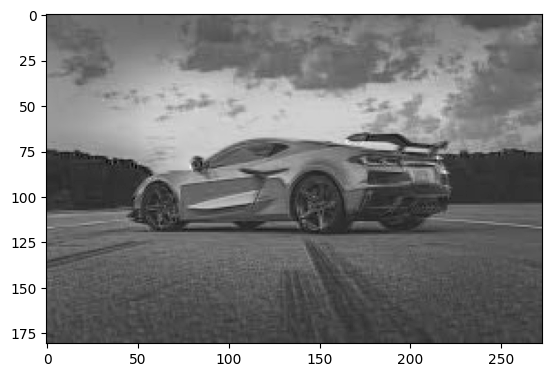

In [22]:
plt.imshow(reshaped_out,cmap="gray")

# Trying with 5 filters

In [ ]:
CONV_LAYER = [tf.keras.layers.Conv2D(filters =5,
                                    kernel_size=(3,3),
                                    strides=(1,1),
                                    input_shape= color_car.shape[1:])]

conv_model = tf.keras.Sequential(CONV_LAYER)
conv_model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 181, 273, 5)         │             140 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 140 (560.00 B)

 Trainable params: 140 (560.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
3*3*3+1

28

In [36]:

def get_conv_model(filters =1, filter_size = (3,3), strides =(1,1),input_shape = None, padding= "valid" ):
  CONV_LAYER = [tf.keras.layers.Conv2D(filters =filters,
                                    kernel_size=filter_size,
                                    strides=strides,
                                    input_shape= input_shape,
                                    padding = padding)]
  conv_model = tf.keras.Sequential(CONV_LAYER)
  conv_model.summary()
  return conv_model


In [37]:

def apply_conv_model_and_visualize(img, conv_model):
  try:
    out = conv_model.predict(img)
    print(f"Output Shape: {out.shape}")
    _, row, col, depth = out.shape
    reshaped_out = out.reshape(row, col, depth)  # Reshape to (row, col, depth)
    for d in range(depth):
      plt.imshow(reshaped_out[:, :, d], cmap="gray")
      plt.show()

  except Exception as e:
    raise e


In [50]:

def reshaping_input(img,grayscale=True):
  if grayscale:
    row,col = img.shape
    img = img.reshape((1,row,col,1))
    return img

  row,col,depth = img.shape
  color_img = img.reshape((1,row,col,depth))
  return color_img

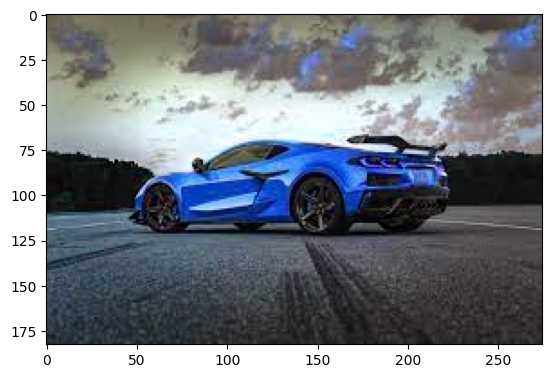

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 183, 275, 5)         │             140 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 140 (560.00 B)

 Trainable params: 140 (560.00 B)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Output Shape: (1, 183, 275, 5)


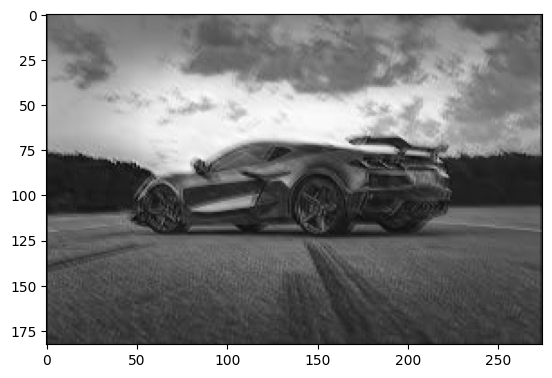

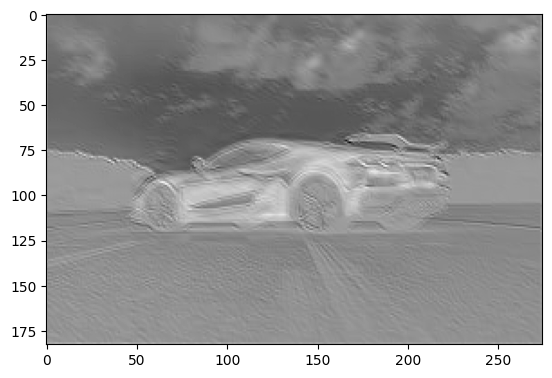

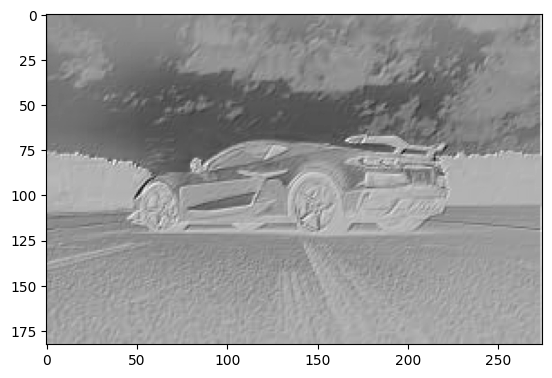

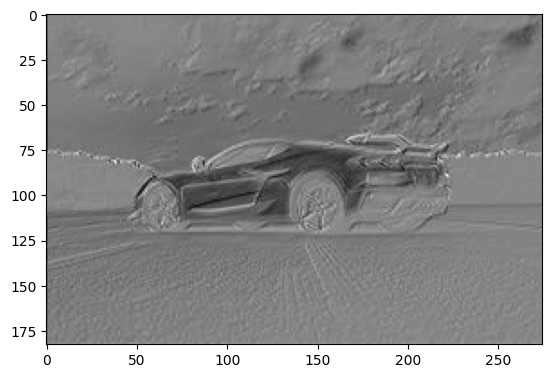

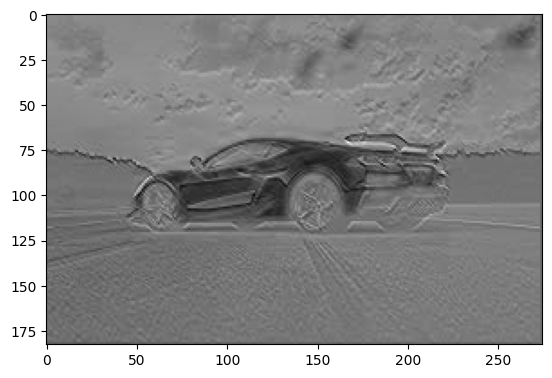

In [51]:
img = read_image(car_image_path,grayscale=False)
input_img = reshaping_input(img, grayscale=False)
model = get_conv_model(filters=5,filter_size = (3,3),strides = (1,1),input_shape=input_img.shape[1:],padding ="same")
apply_conv_model_and_visualize(input_img,model)

In [52]:
def max_pooling(img, pool_size=(2,2),strides=(1,1)):
  reshaped_img = reshaping_input(img)
  pooling_layer = tf.keras.layers.MaxPool2D(pool_size=pool_size,strides=strides)
  result = pooling_layer(reshaped_img)

  print(f"Output Shape: {result.shape}")
  return result

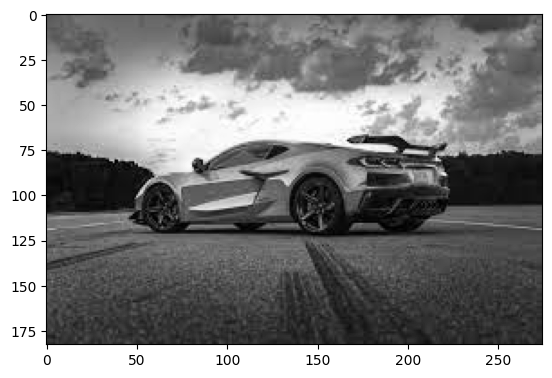

Output Shape: (1, 182, 274, 1)
(1, 182, 274, 1)


In [54]:
img = read_image(car_image_path)
result = max_pooling(img, pool_size=(2,2),strides=(1,1))
print(result.shape)


In [57]:
def  plot_pooling(result):
  _,row,col,_ = result.shape
  reshape = tf.reshape(result,(row,col))
  plt.imshow(reshape,cmap="gray")

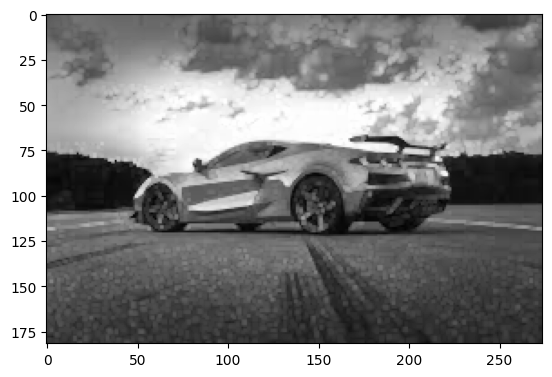

In [58]:
plot_pooling(result)

# Global pooling

In [68]:
def global_pooling(img):
  reshaped_img = reshaping_input(img)
  pooling_layer = tf.keras.layers.GlobalAvgPool2D()
  result = pooling_layer(reshaped_img)

  print(f"Output Shape: {result.shape}")
  return result

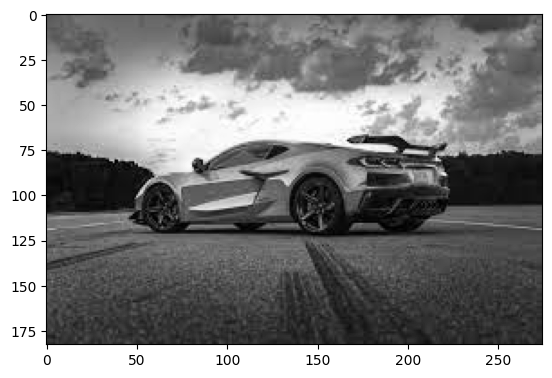

Output Shape: (1, 1)
(1, 1)


In [69]:
img = read_image(car_image_path)
result = global_pooling(img)
print(result.shape)